In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
data = pd.read_csv('expt7.txt', delimiter='\t')

# Calculate concentration from volume
initial_volume = 60  # ml
concentration_stock = 0.1  # N (normality of acetic acid)

def calculate_concentration(volume_added):
    total_volume = initial_volume + volume_added
    concentration = (volume_added * concentration_stock) / total_volume
    return concentration

# Calculate concentrations
data['Concentration'] = data['Volume of Acetic Acid(ml)'].apply(calculate_concentration)


In [27]:
# Calculate the required parameters
data['A'] = (data['Conductance in microsimen(G)'] *1e-6) / (data['Concentration'])
data['X'] = (data['Concentration']) * data['A']
data['Y'] = 1 / data['A']

# Remove any rows with infinity or NaN values
data_clean = data.replace([np.inf, -np.inf], np.nan).dropna()


In [28]:
print(data['X'])

0     0.000043
1     0.000059
2     0.000073
3     0.000084
4     0.000094
5     0.000103
6     0.000112
7     0.000120
8     0.000126
9     0.000133
10    0.000139
11    0.000144
12    0.000150
13    0.000156
14    0.000160
Name: X, dtype: float64


In [29]:
print(data['Y'])

0     19.354714
1     27.975158
2     33.365587
3     38.220456
4     42.372881
5     46.097820
6     49.300635
7     52.170284
8     55.239463
9     57.836900
10    60.496733
11    62.956434
12    64.989602
13    67.058801
14    69.357747
Name: Y, dtype: float64


In [30]:
# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data_clean['X'], data_clean['Y'])


In [31]:
print(slope, intercept, r_value, p_value, std_err)

414228.3218482876 2.923183487062694 0.9995203721826997 5.2324078093245185e-21 3559.521014127978


In [32]:
# Calculate confidence intervals (95%)
n = len(data_clean)
mean_x = np.mean(data_clean['X'])
se_slope = std_err * np.sqrt(n / (n * np.sum(data_clean['X']**2) - np.sum(data_clean['X'])**2))
se_intercept = std_err * np.sqrt(np.sum(data_clean['X']**2) / (n * np.sum(data_clean['X']**2) - np.sum(data_clean['X'])**2))

In [33]:
print(se_slope, se_intercept, r_value, p_value, std_err)

26180158.983710896 3101.1653884876296 0.9995203721826997 5.2324078093245185e-21 3559.521014127978


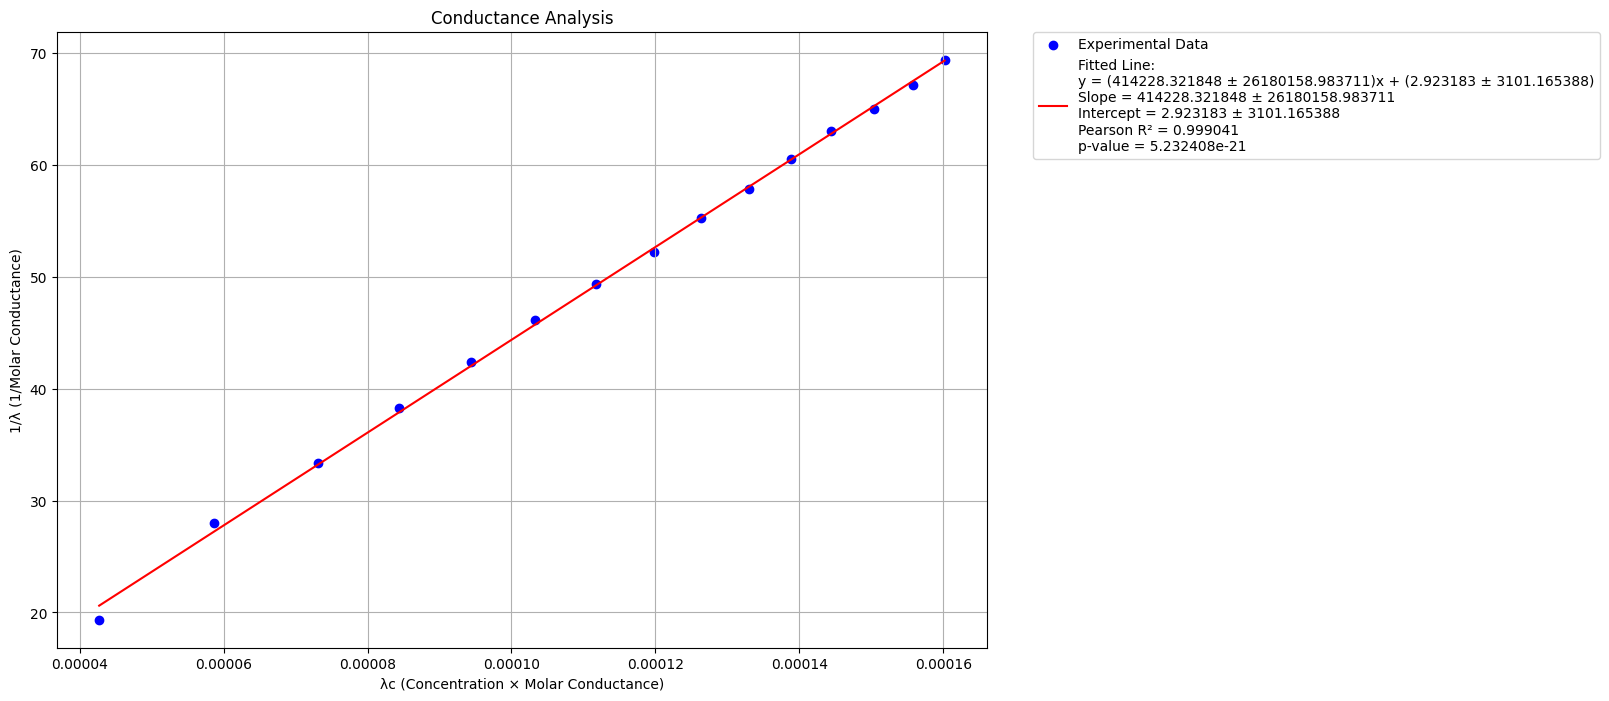

In [41]:
# Create the plot with larger figure size
plt.figure(figsize=(12, 8))
plt.scatter(data_clean['X'], data_clean['Y'], color='blue', label='Experimental Data')
# Generate points for the fitted line
x_fit = np.linspace(data_clean['X'].min(), data_clean['X'].max(), 100)
y_fit = slope * x_fit + intercept

# Create detailed legend text with proper error reporting
legend_text = (
    f'Fitted Line:\n'
    f'y = ({slope:.6f} ± {se_slope:.6f})x + ({intercept:.6f} ± {se_intercept:.6f})\n'
    f'Slope = {slope:.6f} ± {se_slope:.6f}\n'
    f'Intercept = {intercept:.6f} ± {se_intercept:.6f}\n'
    f'Pearson R² = {r_value**2:.6f}\n'
    f'p-value = {p_value:.6e}'
)

plt.plot(x_fit, y_fit, 'r-', label=legend_text)
plt.xlabel('λc (Concentration × Molar Conductance)')
plt.ylabel('1/λ (1/Molar Conductance)')
plt.title('Conductance Analysis')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)

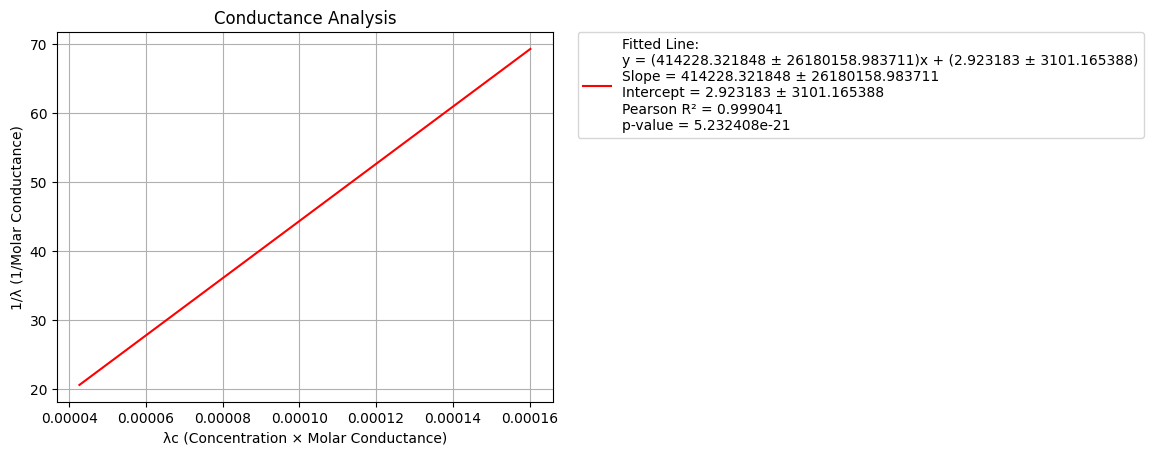

/tmp/ipykernel_47132/2236212529.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


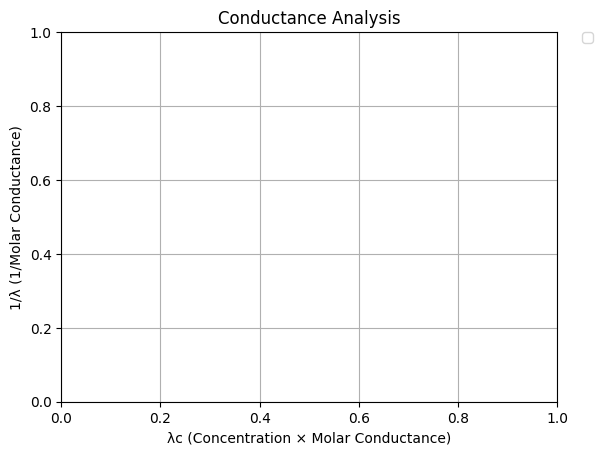

In [39]:
# Calculate G_o and k_a with proper error propagation
G_o = 1 / intercept
G_o_error = (se_intercept / intercept**2)  # Error propagation for 1/x

k_a = 1 / (slope * (G_o ** 2))
k_a_error = k_a * np.sqrt((se_slope/slope)**2 + 4*(se_intercept/intercept)**2)  # Error propagation
